In [1]:
import sys
sys.path.append(r'c:\users\shyam\appdata\local\programs\python\python310\lib\site-packages')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import random
import os
os.chdir(r'C:\Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import pickle
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data=[]
labels=[]
#we have 43 class
classes=43
cur_path=os.getcwd() #gets directory that is where the dataset is available


In [3]:
cur_path

'C:\\Traffic_Sign_Recognition'

In [4]:
#we use for loop to iterate the 43 img *it goes to 0 folder * open image* resize the img to 30X30
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
path="C:\Traffic_Sign_Recognition\Train"
labelFile='labels.csv'
batch_size_val=50
steps_per_epoch_val=502
epoch_val=10
imageDimensions=(32,32,3)
testRatio=0.1
validationRatio=0.2

In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [8]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=testRatio)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validationRatio)

In [9]:
cur_path = os.getcwd()
cur_path

'C:\\Traffic_Sign_Recognition'

In [10]:
print("Data Shapes")
print("Train",end="");print(X_train.shape,y_train.shape)
print("Validation",end="");print(X_validation.shape,y_validation.shape)
print("Test",end="");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number labels in training set"
assert(X_validation.shape[0]==y_validation.shape[0]),"The nnumber of images is not equal to the number of labels in the validation set"
assert(X_test.shape[0]==y_test.shape[0]),"not equal in test se"
assert(X_train.shape[1:]==(imageDimensions)),"Dimension of the training images are  wrong"
assert(X_validation.shape[1:]==(imageDimensions)),"Dimensions of the validation images are wrong"
assert(X_test.shape[1:]==(imageDimensions)),"The dimensions of the test images are wrong"

Data Shapes
Train(28230, 32, 32, 3) (28230,)
Validation(7058, 32, 32, 3) (7058,)
Test(3921, 32, 32, 3) (3921,)


In [11]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


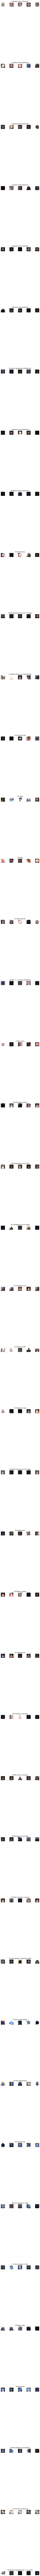

In [12]:
noOfClasses=43
num_of_samples=[]
cols=5
num_classes=noOfClasses
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row["Name"])
            num_of_samples.append(len(x_selected))

[153, 1621, 1605, 1029, 1431, 1339, 298, 1033, 1006, 1046, 1469, 944, 1486, 1549, 580, 455, 292, 798, 845, 157, 258, 226, 276, 369, 201, 1075, 432, 178, 388, 192, 333, 563, 168, 521, 307, 849, 279, 156, 1502, 200, 261, 192, 168]


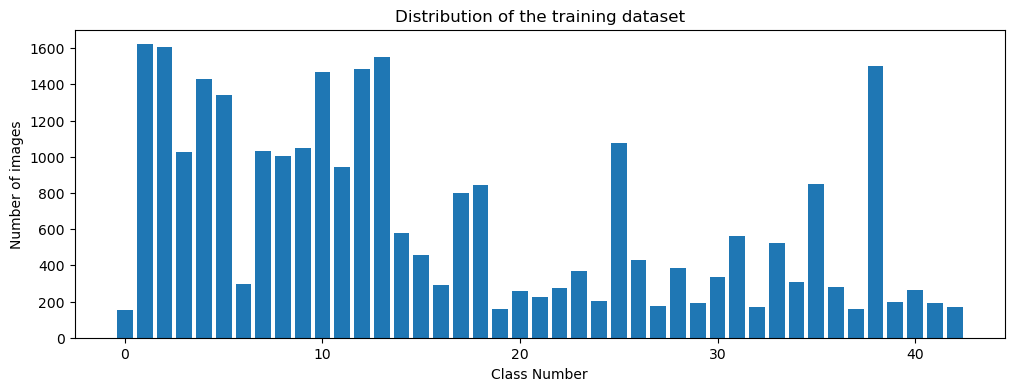

In [13]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")
plt.show()

In [14]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     converting to grayscale
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
#     histogram equalization to improve contrast
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)])

In [15]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

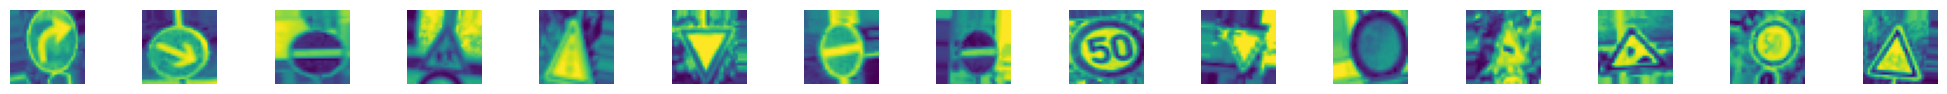

In [16]:
dataGen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
dataGen.fit(X_train)
batches=dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis('off')
plt.show()


y_train=to_categorical(y_train,noOfClasses)
y_validation=to_categorical(y_validation,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)

In [17]:

    no_Of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_Of_Nodes=500
    model=Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(no_Of_Filters,size_of_Filter,activation='relu')))
    model.add(MaxPool2D(pool_size=size_of_pool))
    
    model.add((Conv2D(no_Of_Filters,size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters,size_of_Filter2,activation='relu')))
    model.add(MaxPool2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
   

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
883/883 [==============================] - 94s 104ms/step - loss: 1.0972 - accuracy: 0.6906 - val_loss: 0.1366 - val_accuracy: 0.9594
Epoch 2/10
883/883 [==============================] - 84s 95ms/step - loss: 0.2318 - accuracy: 0.9283 - val_loss: 0.0902 - val_accuracy: 0.9725
Epoch 3/10
883/883 [==============================] - 81s 92ms/step - loss: 0.1588 - accuracy: 0.9516 - val_loss: 0.0780 - val_accuracy: 0.9793
Epoch 4/10
883/883 [==============================] - 83s 94ms/step - loss: 0.1168 - accuracy: 0.9626 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
883/883 [==============================] - 81s 92ms/step - loss: 0.1023 - accuracy: 0.9678 - val_loss: 0.0486 - val_accuracy: 0.9880
Epoch 6/10
883/883 [==============================] - 85s 96ms/step - loss: 0.0894 - accuracy: 0.9721 - val_loss: 0.0343 - val_accuracy: 0.9903
Epoch 7/10
883/883 [==============================] - 82s 93ms/step - loss: 0.0818 - accuracy: 0.9742 - val_loss: 0.0278 - val_accuracy

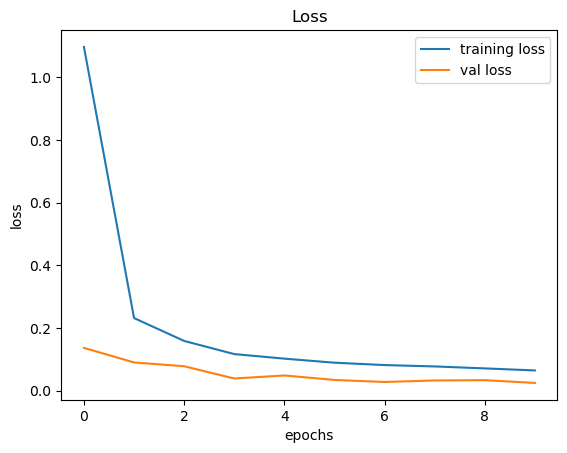

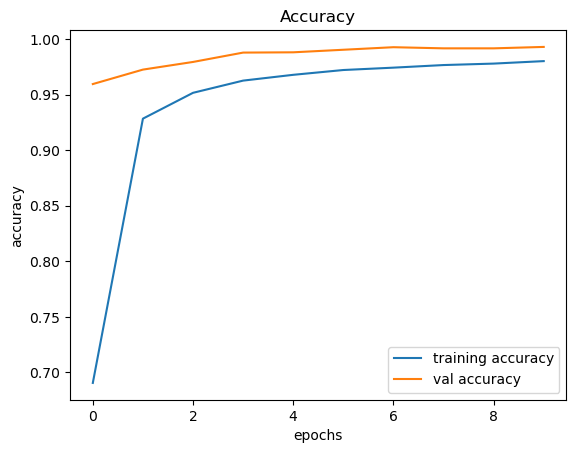

Test Score: 0.024804292246699333
Test Accuracy  0.9928589463233948


In [22]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
score=model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy ',score[1])

In [23]:
model.save("my_model")
model.save_weights("weights.h5")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [26]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_classes'